In [1]:
# Dependencies
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')

/Users/elizabethstenhaug/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/elizabethstenhaug/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/elizabethstenhaug/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.i

In [2]:
# get the stock quote
AAPL_df = web.DataReader('AAPL', data_source='yahoo', start='2000-01-01', end ='2021-12-31')
AAPL_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,5.357968e+08,0.860883
2000-01-04,0.987723,0.903460,0.966518,0.915179,5.123776e+08,0.788302
2000-01-05,0.987165,0.919643,0.926339,0.928571,7.783216e+08,0.799837
2000-01-06,0.955357,0.848214,0.947545,0.848214,7.679728e+08,0.730621
2000-01-07,0.901786,0.852679,0.861607,0.888393,4.607344e+08,0.765229
2000-01-10,0.912946,0.845982,0.910714,0.872768,5.050640e+08,0.751771
2000-01-11,0.887277,0.808036,0.856585,0.828125,4.415488e+08,0.713317
2000-01-12,0.852679,0.772321,0.848214,0.778460,9.760688e+08,0.670537
2000-01-13,0.881696,0.825893,0.843610,0.863839,1.032685e+09,0.744079


In [3]:
# get the total rows and columns in the AAPL Dataset
AAPL_df.shape

(5328, 6)

In [4]:
# create a closing price dataset
Closing_Price_AAPL_df = AAPL_df.filter(['Close'])

# convert the the closing price dataset to a array
Closing_Price_array_AAPL_df = Closing_Price_AAPL_df.values

Closing_Price_array_AAPL_df

array([[  0.99944198],
       [  0.91517901],
       [  0.92857099],
       ...,
       [120.12999725],
       [121.41999817],
       [116.36000061]])

In [5]:
# get the number of rows to train the model on (90 %)
train_closing_price_AAPL_len = math.ceil(len(Closing_Price_array_AAPL_df) * 0.9) # rounded up

train_closing_price_AAPL_len

4796

In [6]:
# Scale de closing price dataset between 0 and 1
scale_AAPL = MinMaxScaler(feature_range=(0,1))
scaled_closing_price_AAPL_df = scale_AAPL.fit_transform(Closing_Price_array_AAPL_df)
scaled_closing_price_AAPL_df

array([[0.00535352],
       [0.00476396],
       [0.00485766],
       ...,
       [0.8388673 ],
       [0.84789298],
       [0.81248999]])

In [7]:
# Training Data
train_closing_price_AAPL = scaled_closing_price_AAPL_df[0:train_closing_price_AAPL_len, :]
# Split Data
x_train =[]
y_train=[]

for i in range(80, len(train_closing_price_AAPL)):
  x_train.append(train_closing_price_AAPL[i-80:i,0])
  y_train.append(train_closing_price_AAPL[i,0])


In [8]:
# convert to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)


In [9]:
# Reshape the dataset
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [10]:
x_train.shape

(4716, 80, 1)

In [11]:
# Building the LSTM model
#x_train = tf.convert_to_tensor(x_train)
#y_train = tf.convert_to_tensor(y_train)

AAPL_model = Sequential()
AAPL_model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
AAPL_model.add(LSTM(50, return_sequences=False))
AAPL_model.add(Dense(25))
AAPL_model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Compile  the LSTM model
AAPL_model.compile(optimizer='adam', loss='mean_squared_error')
#'categorical_crossentropy'

In [13]:
# training the AAPL_model
AAPL_model.fit(x_train,y_train,epochs=1,batch_size=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
4716/4716 [==============================] - 1187s 252ms/step - loss: 1.1796e-04


In [14]:
# Setting the testing Dataset
# scaled testing dataset set from index 1743 to 2003
AAPL_test_dataset= scaled_closing_price_AAPL_df[train_closing_price_AAPL_len - 80: , :]

#setting the x and y test data
x_test = []
y_test = Closing_Price_array_AAPL_df[train_closing_price_AAPL_len, :]
for i in range(80,len(AAPL_test_dataset)):
    x_test.append(AAPL_test_dataset[i-80:i, 0])


In [15]:
# Convert the test dataset to array
x_test = np.array(x_test)
print (x_test)

[[0.39587496 0.39940827 0.40428844 ... 0.26759154 0.26545757 0.27430831]
 [0.39940827 0.40428844 0.39715187 ... 0.26545757 0.27430831 0.27175455]
 [0.40428844 0.39715187 0.39067995 ... 0.27430831 0.27175455 0.2689209 ]
 ...
 [0.83117101 0.82879218 0.81221012 ... 0.8924616  0.87378058 0.85237082]
 [0.82879218 0.81221012 0.8097613  ... 0.87378058 0.85237082 0.8388673 ]
 [0.81221012 0.8097613  0.83438946 ... 0.85237082 0.8388673  0.84789298]]


In [16]:
#reshape the test dataset

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [17]:
x_test.shape

(532, 80, 1)

In [18]:
# getting the model predicted closing price value

predictions = AAPL_model.predict(x_test)
predictions = scale_AAPL.inverse_transform(predictions)

In [19]:
# getting the root mean squared error 

rmse = np.sqrt(np.mean(predictions - y_test) **2)
rmse

41.40623390943484

/Users/elizabethstenhaug/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/elizabethstenhaug/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


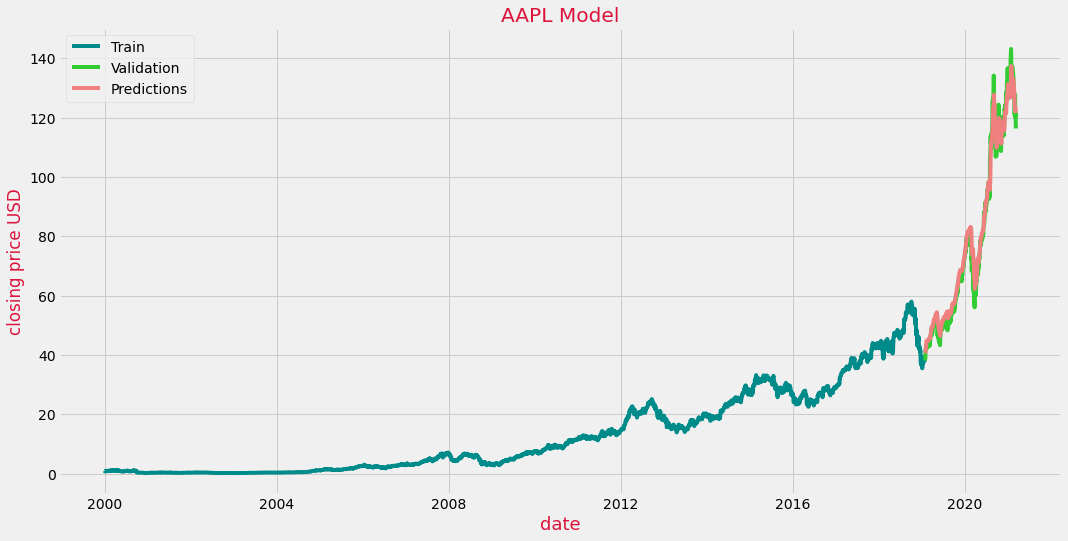

In [20]:
# Plot the Dataset
train_data = Closing_Price_AAPL_df[:train_closing_price_AAPL_len]
validation_data = Closing_Price_AAPL_df[train_closing_price_AAPL_len:]

validation_data['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('AAPL Model', color='crimson')
plt.xlabel('date', fontsize=18, color='crimson')
plt.ylabel('closing price USD', color='crimson')
plt.plot(train_data['Close'], color='darkcyan')
plt.plot(validation_data['Close'], color='limegreen')
plt.plot(validation_data['Predictions'], color = 'lightcoral')
plt.legend(['Train', 'Validation', 'Predictions'])
